In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


plt.rcParams['figure.figsize'] = (12.0, 9.0)
df1 = pd.read_csv('C:\\Users\\KIIT\\Downloads\\boston.csv')
df1.describe()

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
print("Normal Data")
print(df_norm)

Normal Data
     Unnamed: 0      crim    zn     indus  chas       nox        rm       age  \
0      0.000000  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607   
1      0.001980  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698   
2      0.003960  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382   
3      0.005941  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813   
4      0.007921  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321   
..          ...       ...   ...       ...   ...       ...       ...       ...   
501    0.992079  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771   
502    0.994059  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041   
503    0.996040  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312   
504    0.998020  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804   
505    1.000000  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266   

          dis  

In [2]:
df_norm.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

(404, 1)
(102, 1)
(404,)
(102,)


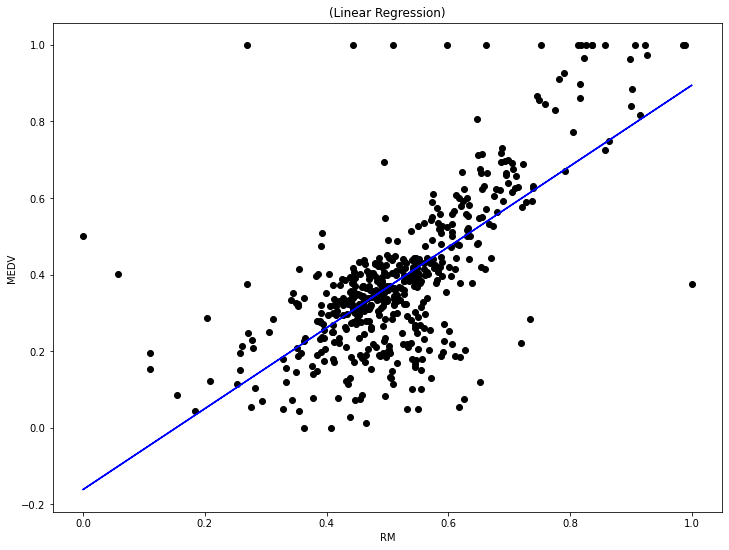

In [3]:
X = pd.DataFrame(np.c_[df_norm['rm']],columns=['rm'])
Y = df_norm['medv']

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

def linear():
    plt.scatter(X, Y, color='black')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('(Linear Regression)')
    plt.xlabel('RM')
    plt.ylabel('MEDV')
    plt.show()
    return
linear()

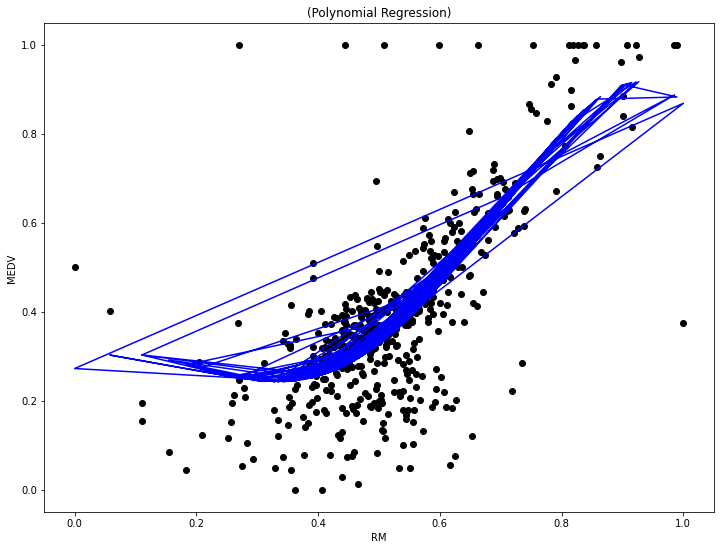

In [20]:
degree=4
poly_reg = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

def polymonial():
    plt.scatter(X, Y, color='black')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('(Polynomial Regression)')
    plt.xlabel('RM')
    plt.ylabel('MEDV')
    plt.show()
    return
polymonial()

In [19]:
lin_reg.predict([[1]])

array([0.89435325])

In [21]:
pol_reg.predict(poly_reg.fit_transform([[1]]))

array([0.86843711])

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree=9
polyreq=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreq.fit(X_train,Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])